# Comparing Security Considerations sections in RFCs and I-Ds

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
%matplotlib inline

Using scripts in `rfc-analysis`, we've parsed all RFCs and the currently active I-Ds for mentions of security and privacy and for measuring the lengths of different sections.

## Loading data

(To run the following steps, you'll need to have downloaded all RFCs and current I-Ds and run both `python search.py --rfc` and `python search.py --id` to generate the data files.)

In [13]:
id_json_file = open('../id-search.json', 'r')
id_json = json.loads(id_json_file.read())

rfc_json_file = open('../rfc-search.json', 'r')
rfc_json = json.loads(rfc_json_file.read())

In [25]:
id_df = pd.json_normalize(id_json)
rfc_df = pd.json_normalize(rfc_json)

In [31]:
rfc_df.columns.values

array(['rfc_number', 'title', 'year', ...,
       'sections.Motivation and Design Rationale',
       'sections.Extension Overview',
       'sections.Certificate with External PSK Extension'], dtype=object)

Let's select just the columns we care about (as we have also imported the length of every section, and the normalization process has made this a very sparse table).

In [34]:
ids_df = id_df[['shortname','lines','privacy_search','security_search','sections.Security Considerations']]

In [56]:
rfcs_df = rfc_df[['rfc_number', 'title', 'year', 'lines', 'privacy_search','security_search','sections.Security Considerations']]

In [57]:
rfcs_df

,rfc_number,title,year,lines,privacy_search,security_search,sections.Security Considerations
0,RFC0001,Host Software,1969,619,0,0,NaN
1,RFC0002,Host software,1969,563,0,0,NaN
2,RFC0003,Documentation conventions,1969,80,0,0,NaN
3,RFC0004,Network timetable,1969,324,0,0,NaN
4,RFC0005,Decode Encode Language (DEL),1969,949,0,0,NaN
...,...,...,...,...,...,...,...
8561,RFC8760,The Session Initiation Protocol (SIP) Digest A...,2020,414,0,4,16.0
8562,RFC8762,Simple Two-Way Active Measurement Protocol,2020,742,0,9,30.0
8563,RFC8768,Constrained Application Protocol (CoAP) Hop-Li...,2020,387,0,3,18.0
8564,RFC8769,Cryptographic Message Syntax (CMS) Content Typ...,2020,248,0,8,7.0


## Comparing Security Considerations sections

Let's look at the lengths of the Security Considerations sections in all the RFCs, year by year. (The box shows the median and interquartile range, the whiskers show the 5th and 95th percentile -- as RFCs can vary in length a lot, the outliers can be extreme.)

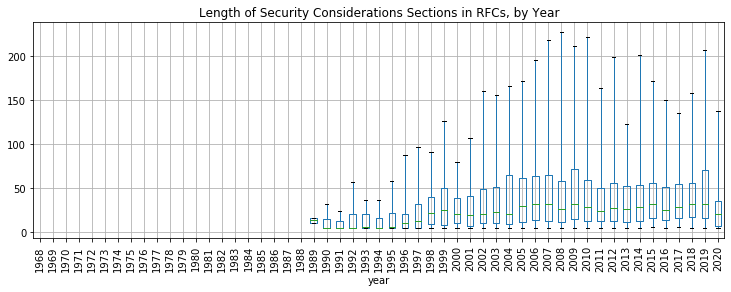

In [77]:
fig, ax = plt.subplots(figsize=(12,4))
rfcs_df.boxplot(column='sections.Security Considerations', 
                by='year', 
                rot=90, 
                whis=[5,95], showfliers=False,
                ax=ax)
ax.set_title('Length of Security Considerations Sections in RFCs, by Year')
plt.suptitle('')
plt.show()

And we can compare this (on the same axis) to the currently active Internet-Drafts.

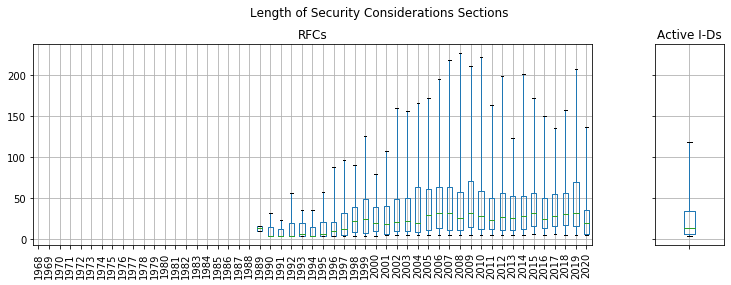

In [114]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,4), gridspec_kw={'width_ratios':[8,1]})
rfcs_df.boxplot(column='sections.Security Considerations', 
                by='year', 
                rot=90, 
                whis=[5,95], showfliers=False,
                ax=ax1)
plt.suptitle('Length of Security Considerations Sections')
plt.subplots_adjust(top=0.85)
ids_df.boxplot(column='sections.Security Considerations', whis=[5,95], showfliers=False, ax=ax2)
ax2.set_xticklabels([''])
ax2.set_title('Active I-Ds')
ax1.set_title('RFCs')
ax1.set_xlabel('')
plt.show()
fig.savefig('security-considerations-comparison.png', dpi=300)

I-Ds seem to have shorter Security Considerations sections than most recent years' published RFCs: at the median and different percentiles. (Total document length doesn't seem to explain the difference.)

## Comparing search term frequencies

We can also look at how often the terms "privacy" and "security" are mentioned.

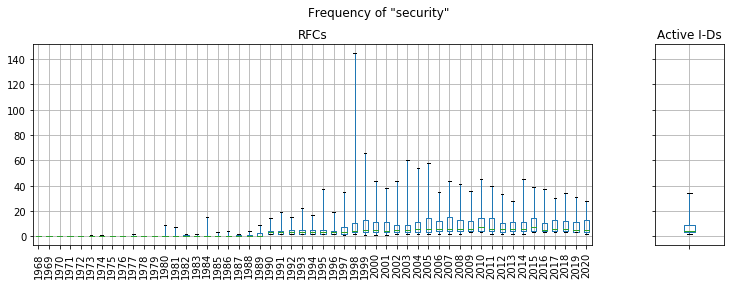

In [112]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,4), gridspec_kw={'width_ratios':[8,1]})
rfcs_df.boxplot(column='security_search', 
                by='year', 
                rot=90, 
                whis=[5,95], showfliers=False,
                ax=ax1)
plt.suptitle('Frequency of "security"')
plt.subplots_adjust(top=0.85)
ids_df.boxplot(column='security_search', whis=[5,95], showfliers=False, ax=ax2)
ax2.set_xticklabels([''])
ax2.set_title('Active I-Ds')
ax1.set_title('RFCs')
ax1.set_xlabel('')
plt.show()

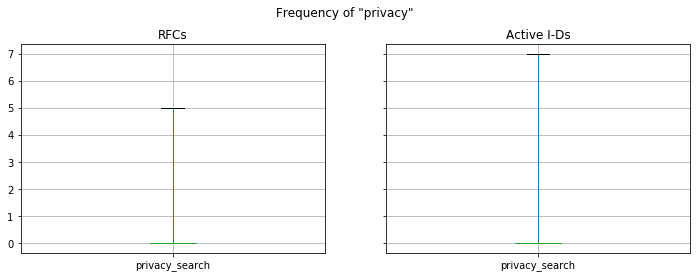

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,4))
rfcs_df.boxplot(column='privacy_search', 
                whis=[5,95], showfliers=False,
                ax=ax1)
plt.suptitle('Frequency of "privacy"')
plt.subplots_adjust(top=0.85)
ids_df.boxplot(column='privacy_search', whis=[5,95], showfliers=False, ax=ax2)
ax2.set_title('Active I-Ds')
ax1.set_title('RFCs')
plt.show()

The term "privacy" is mentioned quite rarely in these IETF docs: at least 75% of the documents in each set don't mention it.